# batch

batch操作将数据集分批，分别输入到训练系统中进行训练，可以减少训练轮次，达到加速训练过程的目的。

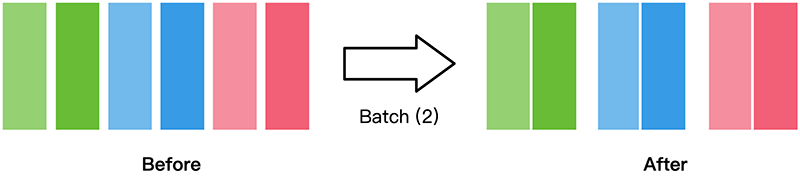

下面的样例先构建了一个数据集，然后分别展示了丢弃多余数据与否的数据集分批结果，其中批大小为2。

In [2]:
import numpy as np
import mindspore.dataset as ds

def generator_func():
    """定义生成数据集函数"""
    for i in range(5):
        yield (np.array([i, i+1, i+2]),)

dataset = ds.GeneratorDataset(generator_func, ["data"])
for data in dataset.create_dict_iterator():
    print(data)

# 采用不丢弃多余数据的方式对数据集进行分批
dataset = ds.GeneratorDataset(generator_func, ["data"])
dataset = dataset.batch(batch_size=2, drop_remainder=False)
print("------not drop remainder ------")
for data in dataset.create_dict_iterator():
    print(data)

# 采用丢弃多余数据的方式对数据集进行分批
dataset = ds.GeneratorDataset(generator_func, ["data"])
dataset = dataset.batch(batch_size=2, drop_remainder=True)
print("------ drop remainder ------")
for data in dataset.create_dict_iterator():
    print(data)

[WARNING] ME(22208:12916,MainProcess):2022-11-15-01:31:38.746.929 [mindspore\dataset\engine\datasets_user_defined.py:656] Python multiprocessing is not supported on Windows platform.
[WARNING] ME(22208:12916,MainProcess):2022-11-15-01:31:38.755.932 [mindspore\dataset\engine\datasets_user_defined.py:656] Python multiprocessing is not supported on Windows platform.
[WARNING] ME(22208:12916,MainProcess):2022-11-15-01:31:38.769.936 [mindspore\dataset\engine\datasets_user_defined.py:656] Python multiprocessing is not supported on Windows platform.


{'data': Tensor(shape=[3], dtype=Int32, value= [0, 1, 2])}
{'data': Tensor(shape=[3], dtype=Int32, value= [1, 2, 3])}
{'data': Tensor(shape=[3], dtype=Int32, value= [2, 3, 4])}
{'data': Tensor(shape=[3], dtype=Int32, value= [3, 4, 5])}
{'data': Tensor(shape=[3], dtype=Int32, value= [4, 5, 6])}
------not drop remainder ------
{'data': Tensor(shape=[2, 3], dtype=Int32, value=
[[0, 1, 2],
 [1, 2, 3]])}
{'data': Tensor(shape=[2, 3], dtype=Int32, value=
[[2, 3, 4],
 [3, 4, 5]])}
{'data': Tensor(shape=[1, 3], dtype=Int32, value=
[[4, 5, 6]])}
------ drop remainder ------
{'data': Tensor(shape=[2, 3], dtype=Int32, value=
[[0, 1, 2],
 [1, 2, 3]])}
{'data': Tensor(shape=[2, 3], dtype=Int32, value=
[[2, 3, 4],
 [3, 4, 5]])}


从上面的打印结果可以看出，数据集大小为5，每2个分一组，不丢弃多余数据时分为3组，丢弃多余数据时分为2组，最后一条数据被丢弃。